In [24]:
import data_frame
import models
import importlib
import evaluator as ev

importlib.reload(models)

<module 'models' from '/home/kdrabicki/projekt/models.py'>

In [8]:
filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [12]:
df.data.loc[~df.data["faint"], "MAG_GAAP_r"].max()

np.float32(22.859985)

In [13]:
model = models.MLModelContext(strategy=models.ANNDoubleGauss(df))
model.train()
model.test_predict()

2025-07-14 09:20:48.978684: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-07-14 09:20:48.978711: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-14 09:20:48.978718: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: borsuk
2025-07-14 09:20:48.978720: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: borsuk
2025-07-14 09:20:48.978817: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 570.133.7
2025-07-14 09:20:48.978839: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 5

Epoch 95: early stopping
Restoring model weights from the end of the best epoch: 65.


2025-07-14 09:23:32.145152: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
/home/kdrabicki/projekt/models.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.616989254951477' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred"] = y_pred
/home/kdrabicki/projekt/models.py:200: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7358153462409973' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred_std"] = y_std


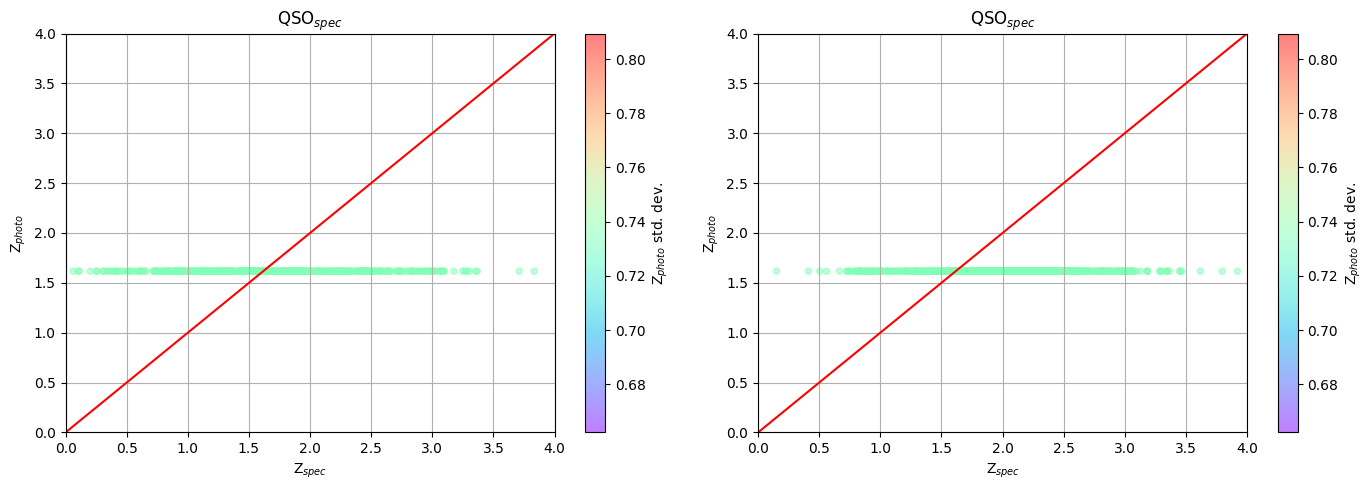

,MSE,R^2,Redshift error
test,0.564054,-0.006448,"(0.06357580987645978, 0.33190407887745604)"
faint,0.565923,-0.657831,"(-0.12181483452512311, 0.18405315143557205)"


In [16]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()

In [73]:
raw_model = model.strategy.network
scaler = model.strategy.scaler
X_test, y_test = df.get_test_dataset()
X_train, y_train = df.get_train_dataset()
X_test = scaler.transform(X_test)
x = 363
y_model = raw_model(X_test[x:x+1])

In [74]:
print("Output distribution mean:",y_model.mean().numpy())
print("Train dastaset mean:",y_train.mean())
print("Output distribution std:",y_model.stddev().numpy())
print("Train dataset std:",y_train.std())

Output distribution mean: [1.6724964]
Train dastaset mean: 1.6695173208392102
Output distribution std: [0.74353284]
Train dataset std: 0.7444592415466716


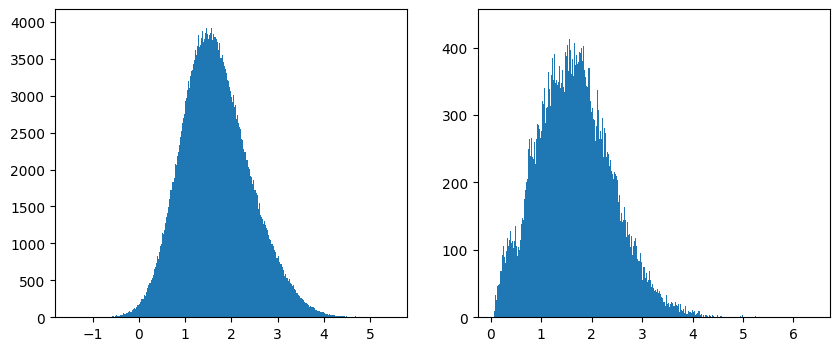

In [75]:
samples = y_model.sample(1000000).numpy()

fig, ax = plt.subplots(1,2, figsize=(10,4))

# Predicted distribution
ax[0].hist(samples, bins=1000)

# Distribution of entire train dataset
ax[1].hist(y_train, bins=1000)

plt.show()